# Model Evaluation and Improvement

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from IPython.display import display
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Overview

이번장에서는 supervised learning 을 제대로 평가하는 방법을 알아봅니다. `cross validation`, `grid search`을 통해서 최적의 파라메터를 찾으며 제대로 된 방법으로 모델을 평가하구요. `evaluation metric`을 통해서 데이터셋의 속성에 따라서 제대로 된 평가방법을 고르는 방법을 배웁니다.

## Cross Validation

Cross validation 은 퍼포먼스를 평가하기 위한 일반적인 방법의 하나입니다. 여러 cv 방법이 있습니다. 여기서는 다음 방법들을 알아봅니다:
- k-fold cv
- stratified k-fold cv
- leave-one-out cv
- shuffle-split cv
- group cv

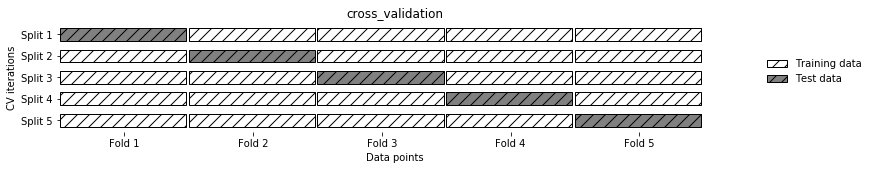

In [2]:
mglearn.plots.plot_cross_validation();

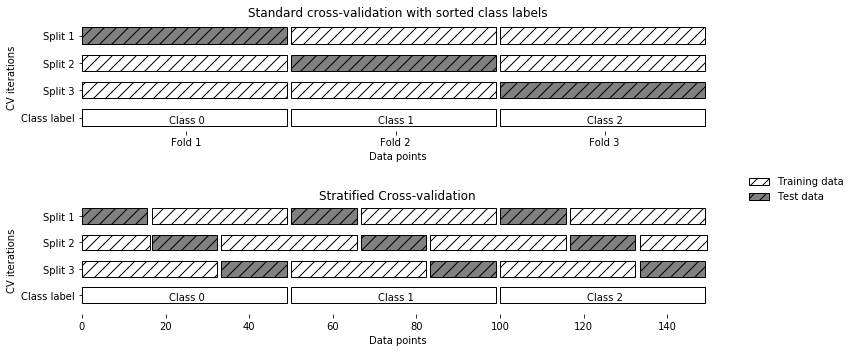

In [3]:
mglearn.plots.plot_stratified_cross_validation();

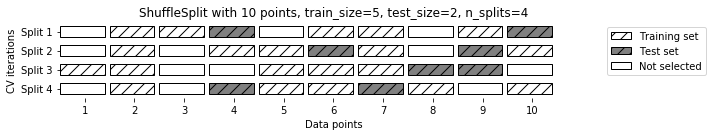

In [4]:
mglearn.plots.plot_shuffle_split();

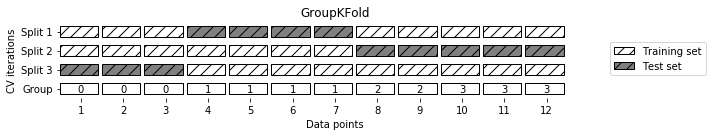

In [5]:
mglearn.plots.plot_group_kfold();

예제를 하나 보죠. `stratified k-fold`는 다음처럼 사용가능합니다.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         0.96666667 0.93333333 0.9        1.        ]


`sklearn.model_selection` 패키지에는 `cv`, `grid search` 함수들이 있습니다.

In [7]:
import sklearn.model_selection
dir(sklearn.model_selection)

['BaseCrossValidator',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'fit_grid_point',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'validation_curve']

## Grid Search

Grid Search 는 `for-loop`으로 구현이 가능합니다. 그런걸 `GridSearch`를 사용해서 쉽게 해줍니다.

In [8]:
# 그냥 for-loop 으로 가장 좋은 score 를 가진 모델을 구하려면 이렇게 짜죠.
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [9]:
# 위의 코드에 cv 를 사용하며 더 짧은 코드로 짜보겠습니다.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


그 외에 `n_jobs` 파라메터를 사용해서 병렬화 하는 방법이 책에 나옵니다. 게다가, [6장](06-algorithm-chains-and-pipelines.ipynb)의 `pipeline`을 사용하면 정말 짧고 강력하게 코드를 짤 수 있습니다.

## Evaluation Metrics

Supervised learning을 평가하는 방법들에 대해서 알아봅니다.

classification 을 평가하는 방법으로 다음 방법들을 알아봅니다.
- $Precision = \frac{TP}{TP+FP}$
- $Recall = \frac{TP}{TP+FN}$
- $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$
- $F = 2 * \frac{precision * recall}{precision + recall}$

### Confusion Matrix
TP, TN, FP, FN 을 손쉽게 보는 방법이 confusion matrix 입니다. sklearn에서는 `sklearn.metrics.confusion_matrix`을 지원합니다.

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.81
logreg score: 0.98


In [12]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


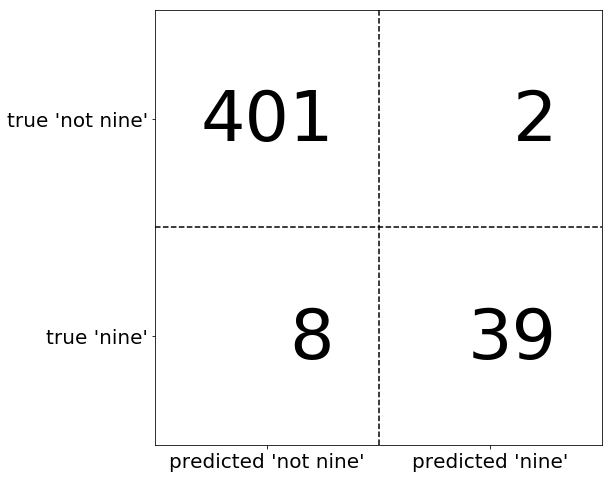

In [13]:
mglearn.plots.plot_confusion_matrix_illustration();

### Using scoring for Grid Search
이렇게 다른 scoring 방법을 배우는 것은, 그 scoring 방법대로 cross validation 을 해서 더 좋은 모델을 찾을 수 있기 때문이죠. 예제를 보겠습니다.

In [14]:
# Scoring 을 기본으로 합니다. 기본값은 NULL이어서 아마도 accuracy score 를 사용할 것 같습니다.
default_score = cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)
print("Default scoring: {}".format(default_score))

# accuracy 를 사용합니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

# AUC 를 사용합니다.
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.9        0.9        0.89972145 0.89972145 0.89972145]
Explicit accuracy scoring: [0.9        0.9        0.89972145 0.89972145 0.89972145]
AUC scoring: [0.99674211 0.99725652 0.99552804 0.99836601 0.99165807]


### Precision vs Recall
scoring 에서 중요한 것 중에 하나는, `precision`, `recall`이 항상 두 개가 같게 좋아지는 방법은 없고, trade-off 관계라는 것입니다. 예제에서 알아볼까요?

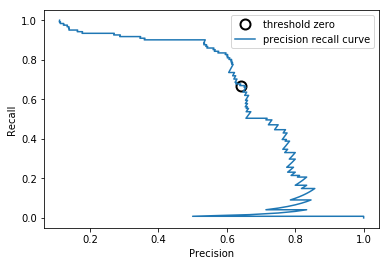

In [15]:
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve

# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best");

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of svc: {:.3f}".format(ap_svc))

f1_score of svc: 0.656
Average precision of svc: 0.666


### ROC and AUC
다른 방법으로는, `ROC (eceiver operating characteristics curve)` 커브라는 것이 있습니다. precision, recall 대신에, false positive rate (FPR) 과 the true positive rate (TPR)의 관계를 보여주는 것이죠.

$FPR = \frac{FP}{FP+TN}$

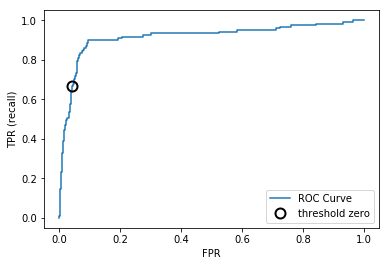

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

ROC를 single number로 요약하려면, area under the curve (AUC) 스코어를 보면 됩니다. `roc_auc_score`라고 정의되어 있습니다.

In [18]:
# Precision, recall 때보다 훨씬 좋은 결과가 나오네요!
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for SVC: 0.916


### Multi-class classification
보통 F-score 를 사용한다고 합니다.

### Regression Metrics
보통 $R^2$ 를 사용한다고 합니다.

### Scoring Metrics
마지막으로 `sklearn`에 있는 모든 evaluation metrics들을 알아봅니다.

In [19]:
from pprint import pprint
from sklearn.metrics.scorer import SCORERS
pprint(sorted(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']


## Summary

이번장에서는 `cross validation`, `grid search`, `evaluation metric` 을 배웠습니다. 여기에, [6장](06-algorithm-chains-and-pipelines.ipynb)의 `pipeline`과 함께라면 [titanic](https://github.com/tomowind/kaggle-titanic) 같은 supervised learning 을 사용하는 모델링은 쉽게 할 수 있습니다.